In [115]:
from utils import prepare_jupyter
prepare_jupyter()

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data import BINARY_CLASS_SETS
from thesis.io import NAMES, read_csv

# BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-10-08'
BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/rank-08-09'
# BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-21-09'

## Ranking

In [56]:
dfs = [(name, read_csv(BASE_DIR, name)) for name in NAMES]
dataset_names = [name for (name, _) in BINARY_CLASS_SETS]

results = {}

for estimator_name, df in dfs:
    for (n, dataset_name), group in df.groupby(['n_estimators', 'dataset_name']):
        acc = group['accuracy']
        best_acc = acc.max()
        
        estimator_id = f'{estimator_name}_{n}'
        
        if dataset_name not in results:
            results[dataset_name] = {}
            
        results[dataset_name][estimator_id] = best_acc
        
pd.DataFrame(results).transpose()

ranked_results = {}

for dataset_name, estimator_results in results.items():
    keys = list(estimator_results.keys())
    values = list(estimator_results.values())
    ranks = np.argsort(values) # TODO: These are not ranks
    ranked_results[dataset_name] = {key:rank for key, rank in zip(keys, ranks)}
    
table = pd.DataFrame(ranked_results).transpose()
table
# pd.DataFrame(results).transpose()

# sum_ranks = table.sum(axis=0)
# args = sum_ranks.values.argsort()
# list(sum_ranks[args].index)
# ranking = list(sum_ranks[args].index)
# ranking

,adaboost_10,adaboost_100,adaboost_50,bagging_10,bagging_100,bagging_50,catboost_10,catboost_100,catboost_50,lgb_10,lgb_100,lgb_50,randomforest_10,randomforest_100,randomforest_50,xgboost_10,xgboost_100,xgboost_50
SPECT,16,17,14,4,1,0,15,13,12,11,9,7,5,6,3,2,10,8
boston,2,10,9,12,8,13,11,5,17,0,7,6,15,14,16,4,1,3
cmc,0,2,1,17,12,14,3,4,5,10,6,7,15,13,16,11,8,9
flags,12,11,6,10,5,13,17,8,9,1,0,3,16,14,15,2,4,7
glass,15,13,14,10,3,2,4,17,9,6,7,8,11,16,12,0,1,5
ionosphere,16,14,15,1,9,10,3,2,17,6,4,5,13,8,11,0,12,7
isolet,10,8,9,0,11,12,3,15,2,5,14,4,13,17,16,1,7,6
lymph,17,12,15,11,6,5,2,16,10,0,7,3,9,14,13,1,4,8
oil_spill,17,11,12,0,13,14,4,2,3,7,5,6,10,8,9,1,16,15
pollution,2,4,3,12,14,15,11,10,6,1,9,8,13,17,16,0,5,7


In [110]:
dfs = [(name, read_csv(BASE_DIR, name)) for name in NAMES]
dataset_names = [name for (name, _) in BINARY_CLASS_SETS]

results = {}

for estimator_name, df in dfs:
    for (n, dataset_name), group in df.groupby(['n_estimators', 'dataset_name']):
        acc = group['accuracy']
        best_acc = acc.max()
        
        estimator_id = f'{estimator_name}_{n}'
        
        if dataset_name not in results:
            results[dataset_name] = {}
            
        results[dataset_name][estimator_id] = best_acc
        
results = pd.DataFrame(results).transpose()
ranked_results = results.rank(ascending=1, axis=1, method='dense')
ranked_results

,adaboost_10,adaboost_100,adaboost_50,bagging_10,bagging_100,bagging_50,catboost_10,catboost_100,catboost_50,lgb_10,lgb_100,lgb_50,randomforest_10,randomforest_100,randomforest_50,xgboost_10,xgboost_100,xgboost_50
SPECT,6.0,6.0,6.0,2.0,1.0,1.0,6.0,5.0,5.0,5.0,4.0,3.0,2.0,2.0,1.0,1.0,4.0,4.0
boston,2.0,5.0,5.0,6.0,4.0,6.0,6.0,3.0,9.0,1.0,3.0,3.0,8.0,7.0,8.0,3.0,2.0,2.0
cmc,1.0,2.0,2.0,13.0,10.0,11.0,2.0,3.0,4.0,8.0,5.0,6.0,12.0,11.0,12.0,9.0,7.0,8.0
flags,4.0,4.0,3.0,4.0,3.0,4.0,7.0,4.0,4.0,1.0,1.0,2.0,6.0,4.0,5.0,2.0,3.0,3.0
glass,6.0,5.0,5.0,4.0,2.0,2.0,2.0,7.0,4.0,2.0,3.0,3.0,4.0,6.0,4.0,1.0,2.0,2.0
ionosphere,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
isolet,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
lymph,6.0,5.0,6.0,5.0,3.0,3.0,2.0,6.0,5.0,1.0,3.0,2.0,4.0,5.0,5.0,2.0,3.0,3.0
oil_spill,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pollution,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,3.0,3.0,4.0,4.0,4.0,1.0,3.0,3.0


## Wielkość drzew

In [130]:
base_dir = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-22-09'
dfs = [(name, read_csv(base_dir, name)) for name in NAMES]

def measure_per_set_plot(measure):
    num_dfs = len(dfs)
    fig, axes = plt.subplots(nrows=len(dfs) // 2, ncols=2, figsize=(20, 20), sharex=True)
    for ax, (df_name, df) in zip(axes.flat, dfs):
        num_nodes = df[measure]
        ax.set_title(df_name)
        num_nodes.hist(ax=ax, bins=20)

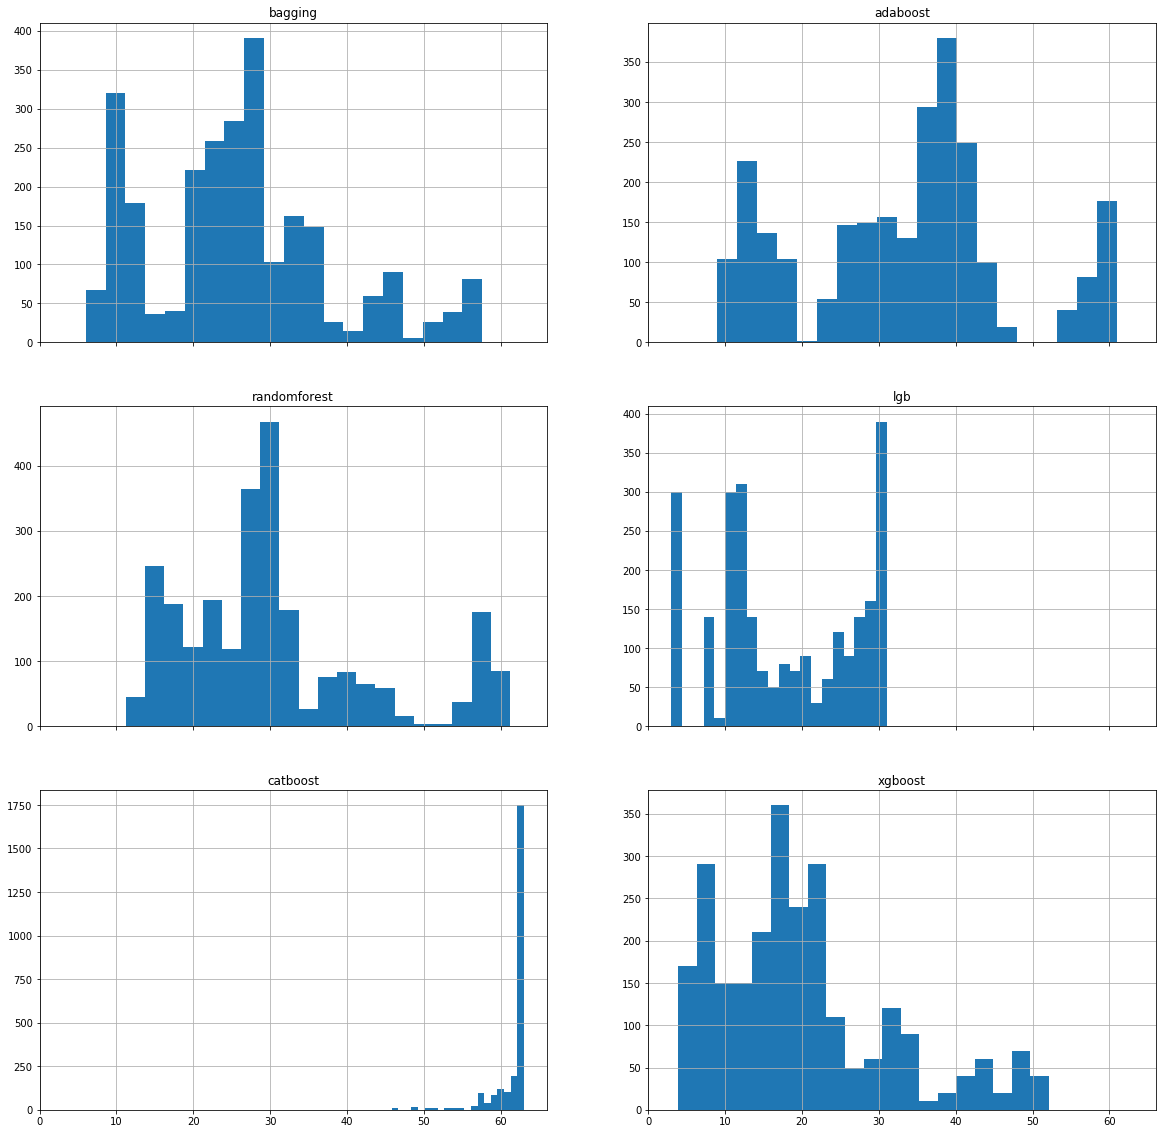

In [131]:
measure_per_set_plot('avg_node_count')

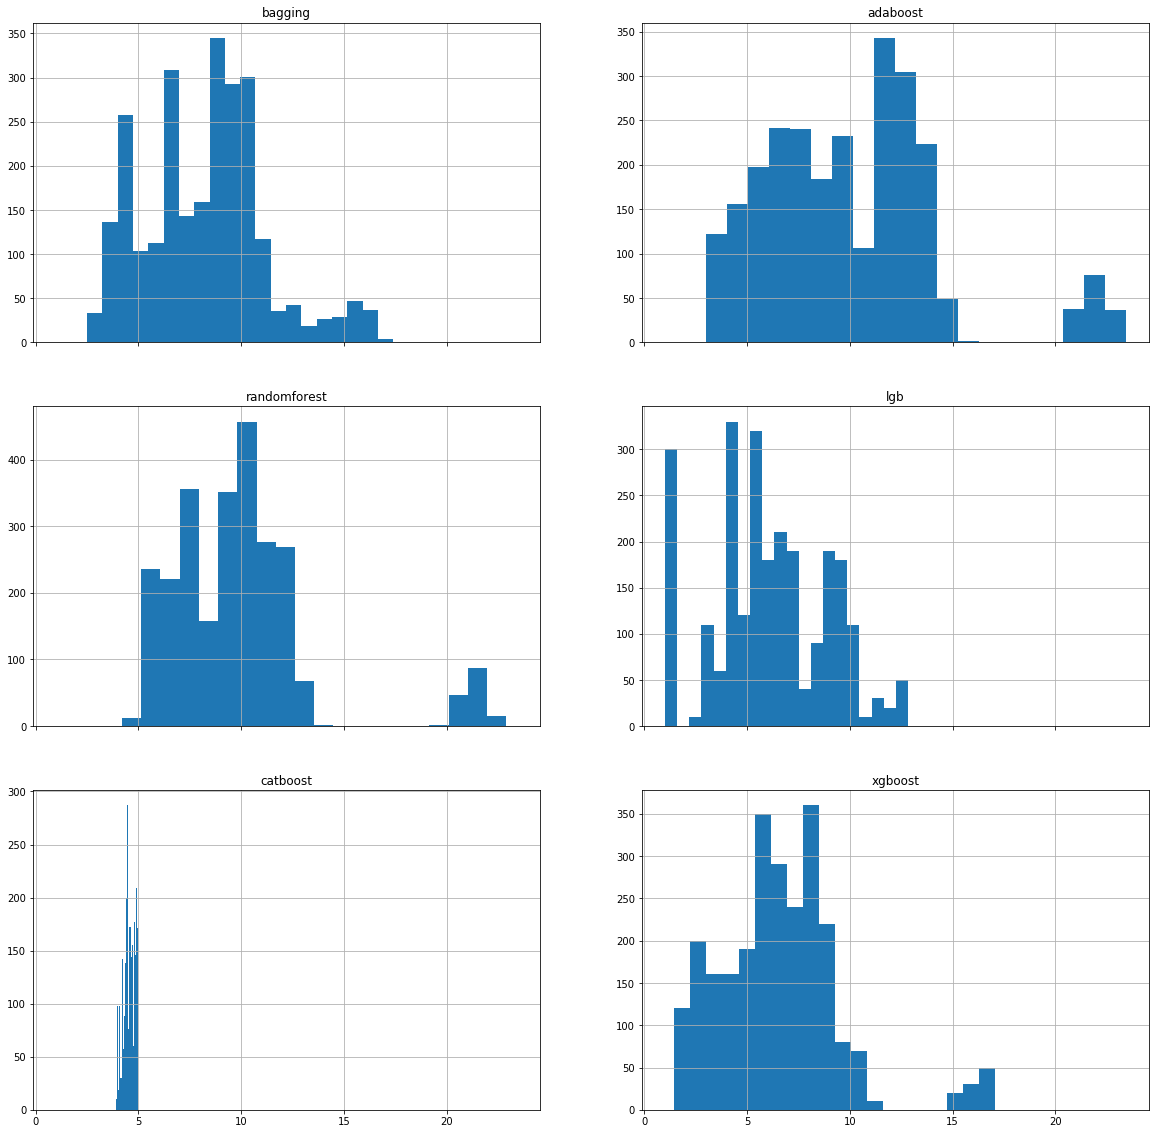

In [132]:
measure_per_set_plot('avg_attributes_used')

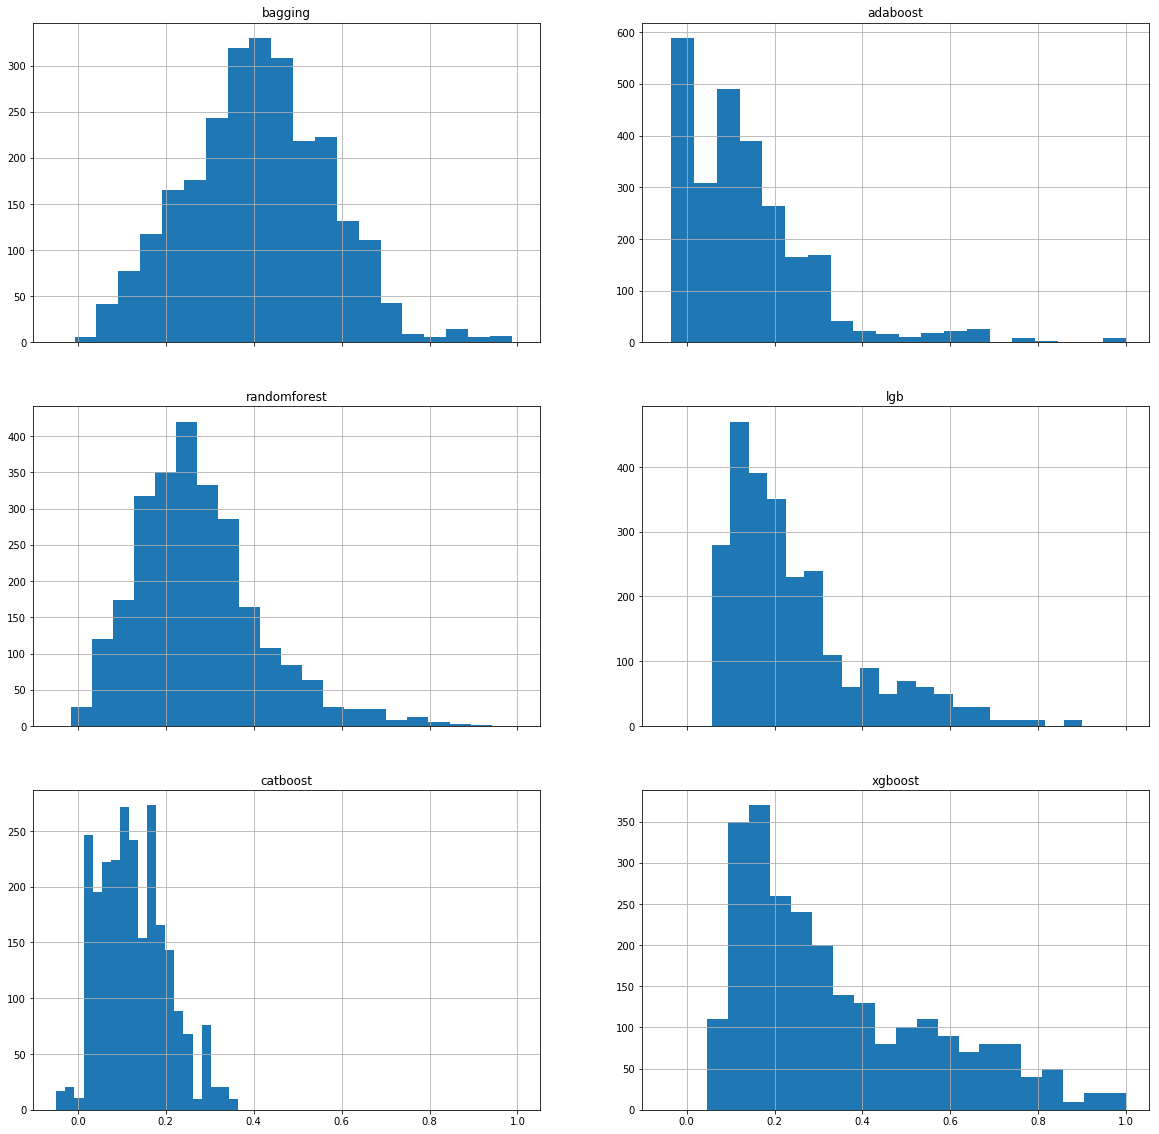

In [133]:
measure_per_set_plot('corr')

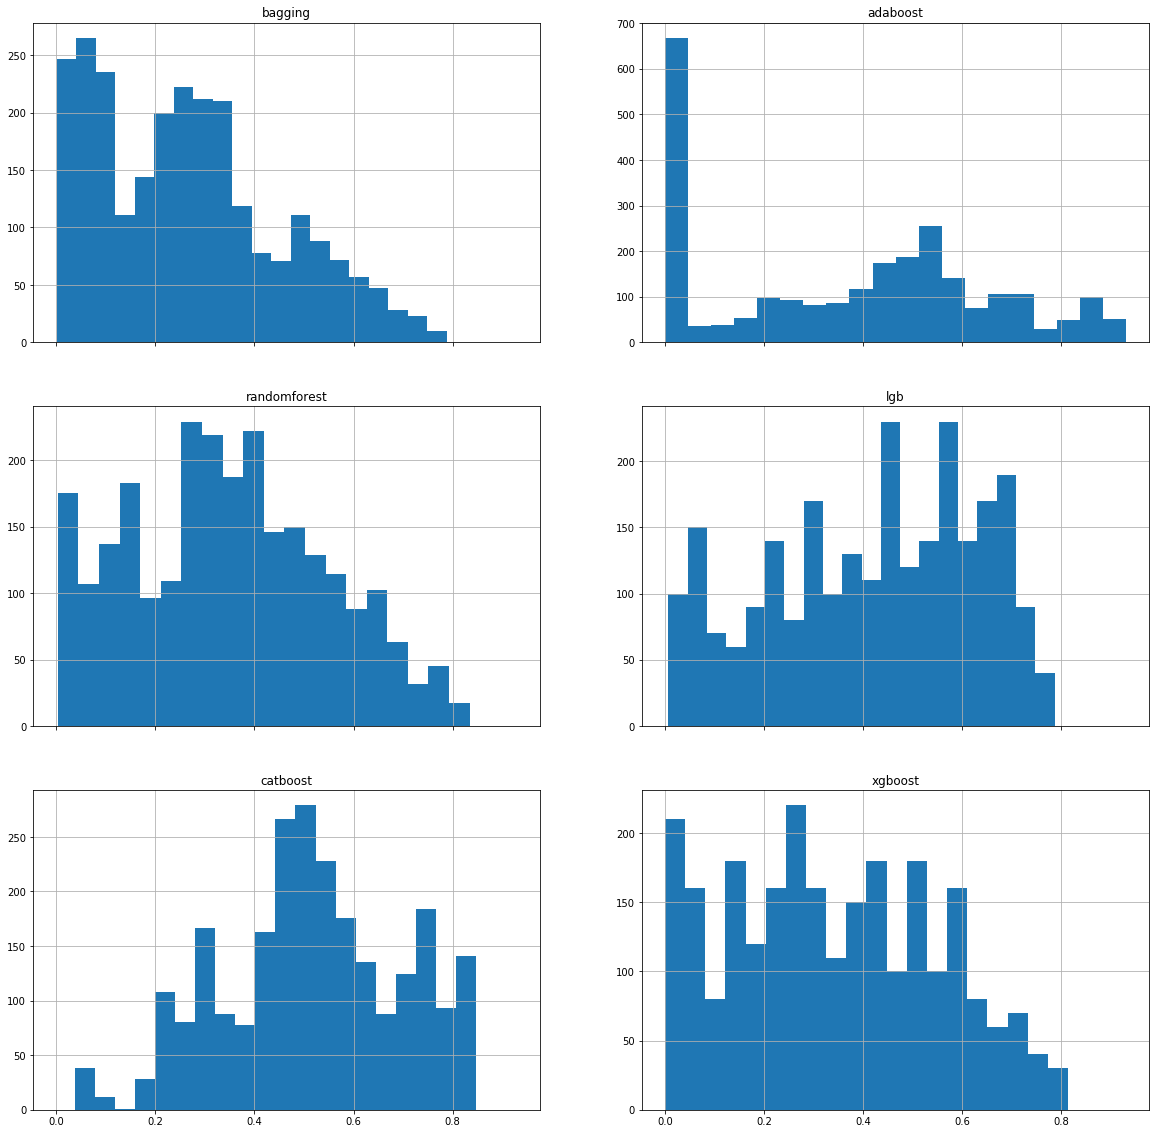

In [134]:
measure_per_set_plot('entropy')

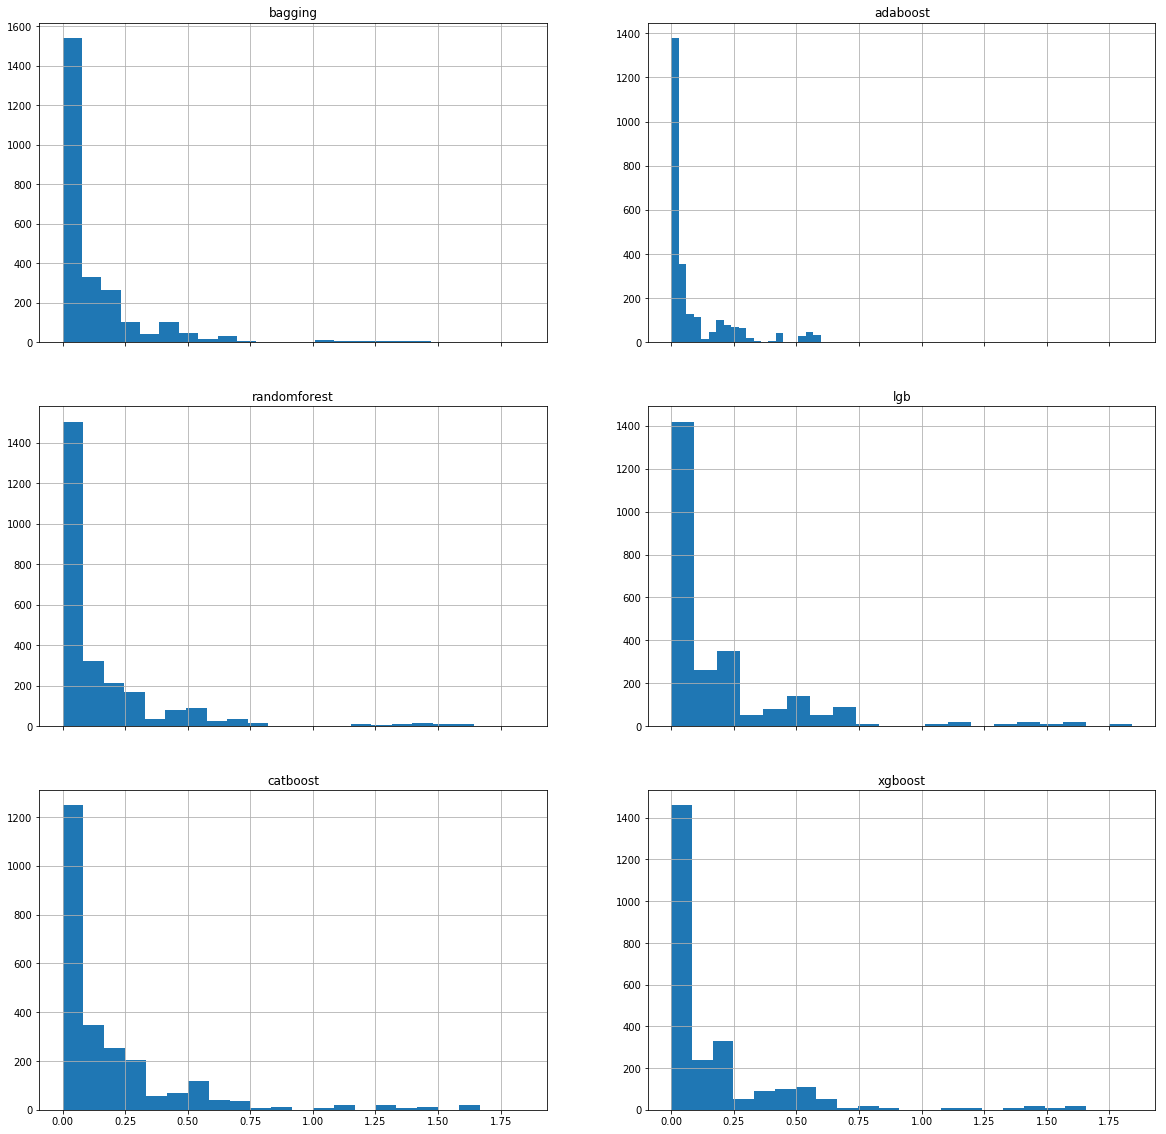

In [135]:
measure_per_set_plot('kw')

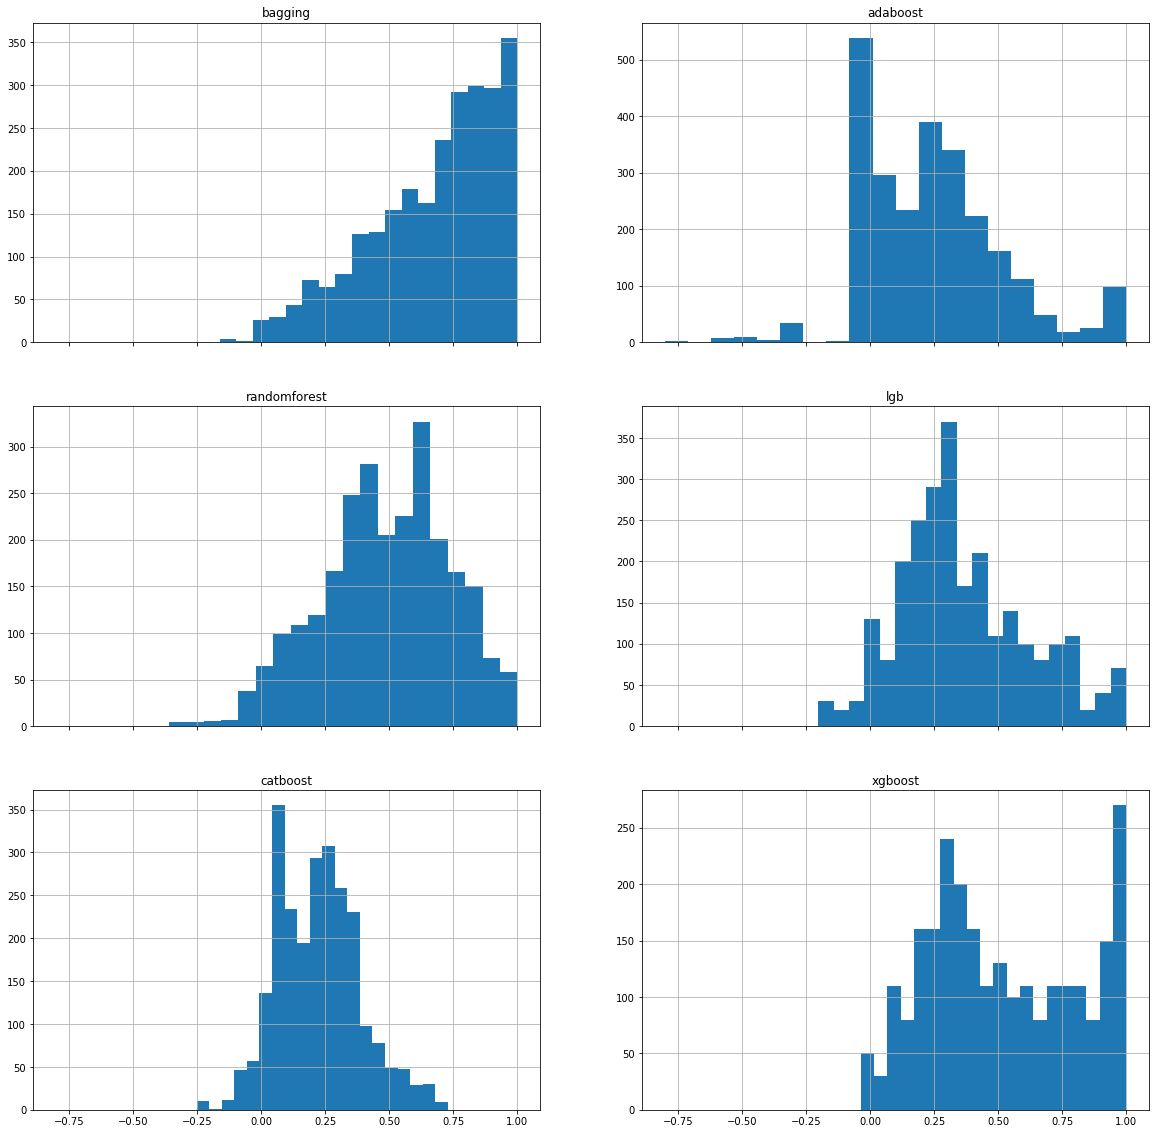

In [136]:
measure_per_set_plot('q')

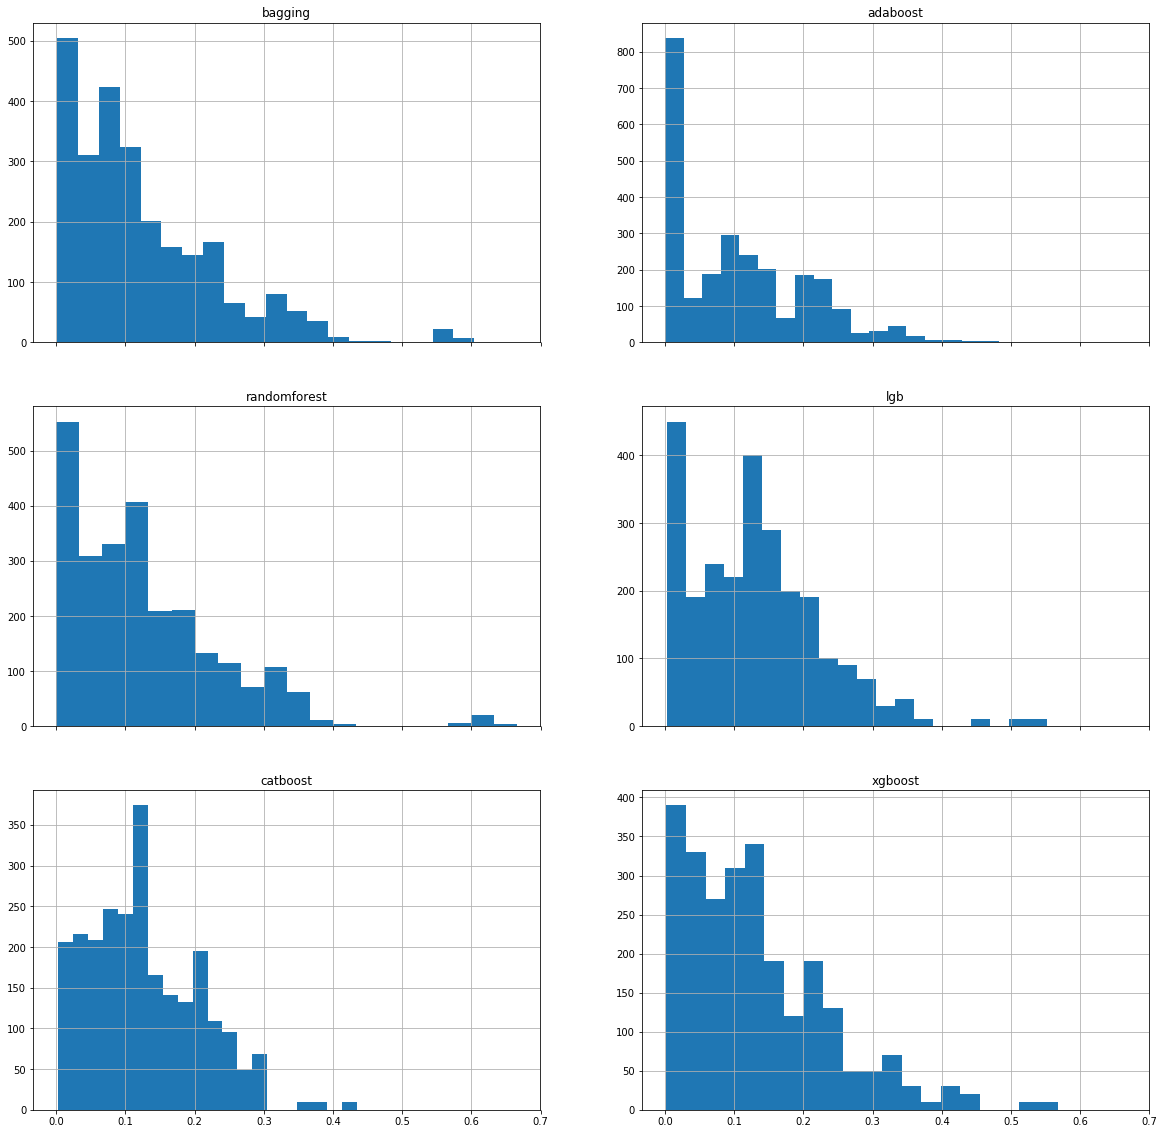

In [137]:
measure_per_set_plot('df')

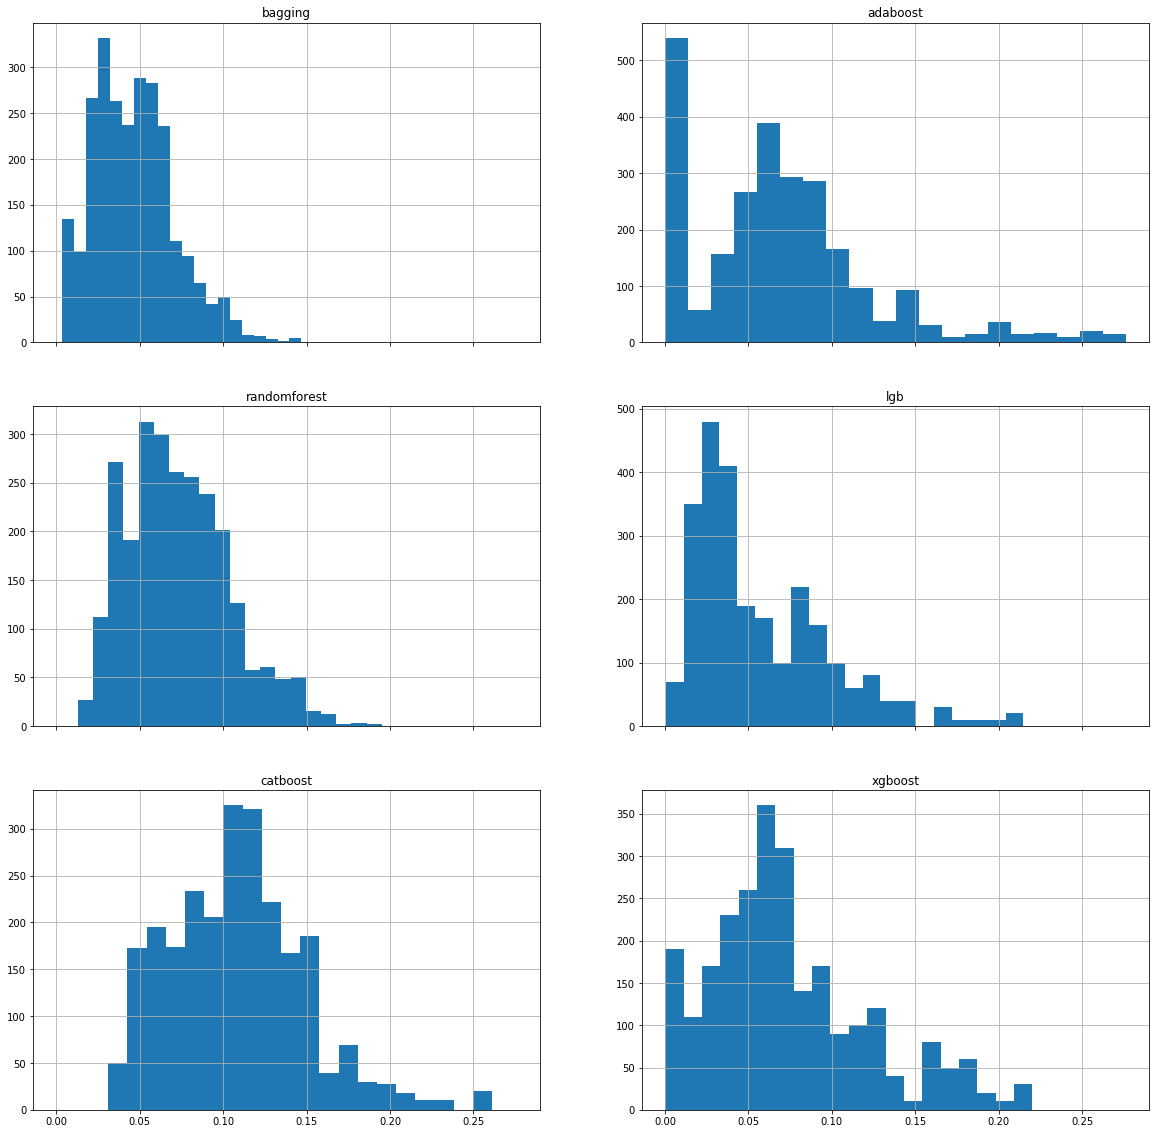

In [138]:
measure_per_set_plot('coverage_minmax')

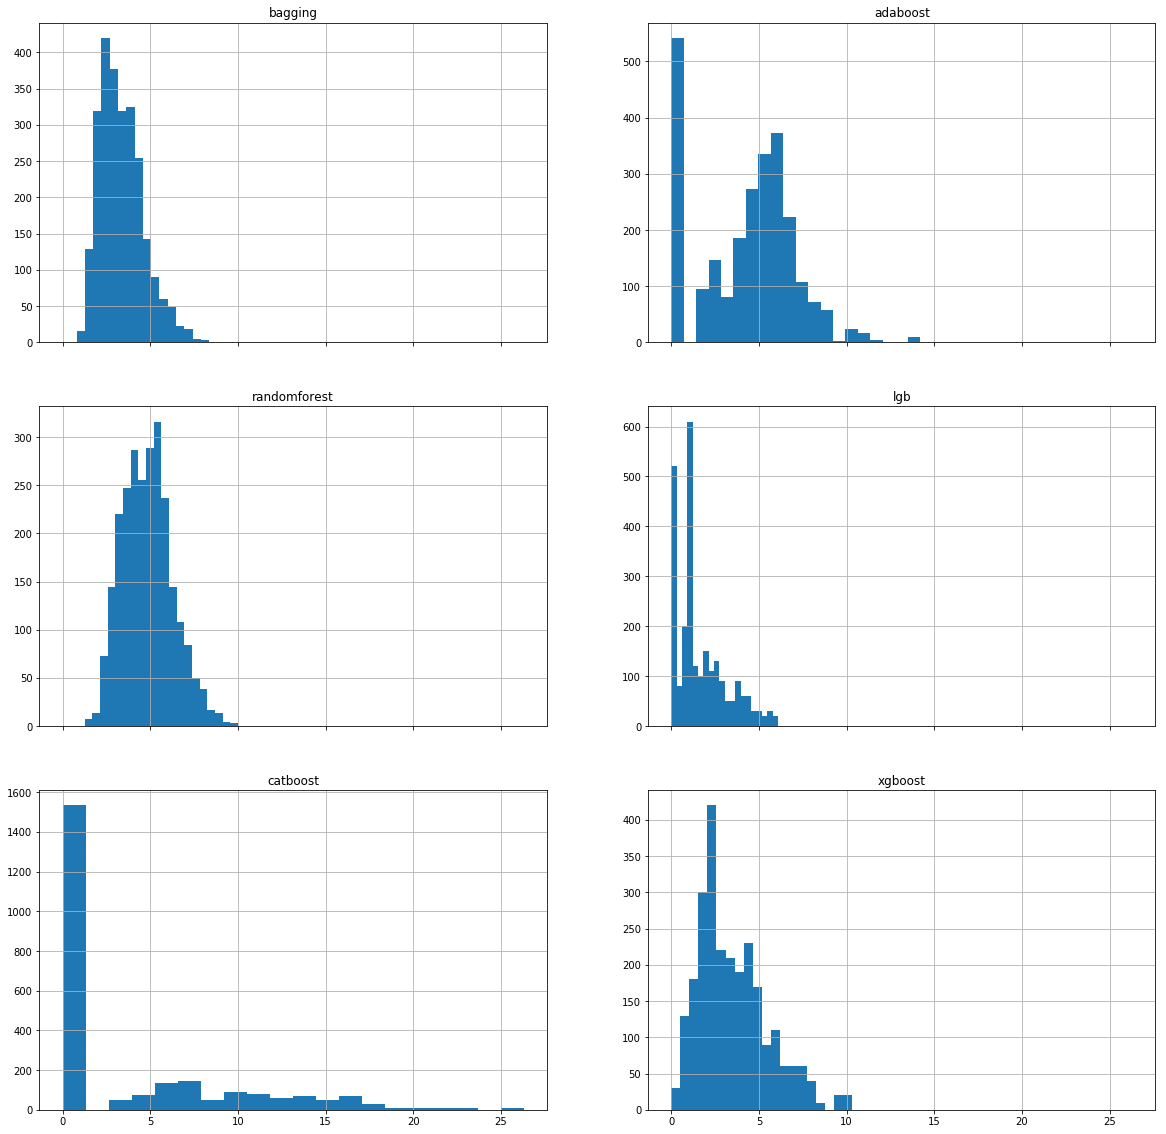

In [139]:
measure_per_set_plot('node_diversity')

## Liczba wykorzystanych atrybutów

Porównanie do średniej liczby wierzchołków w drzewie

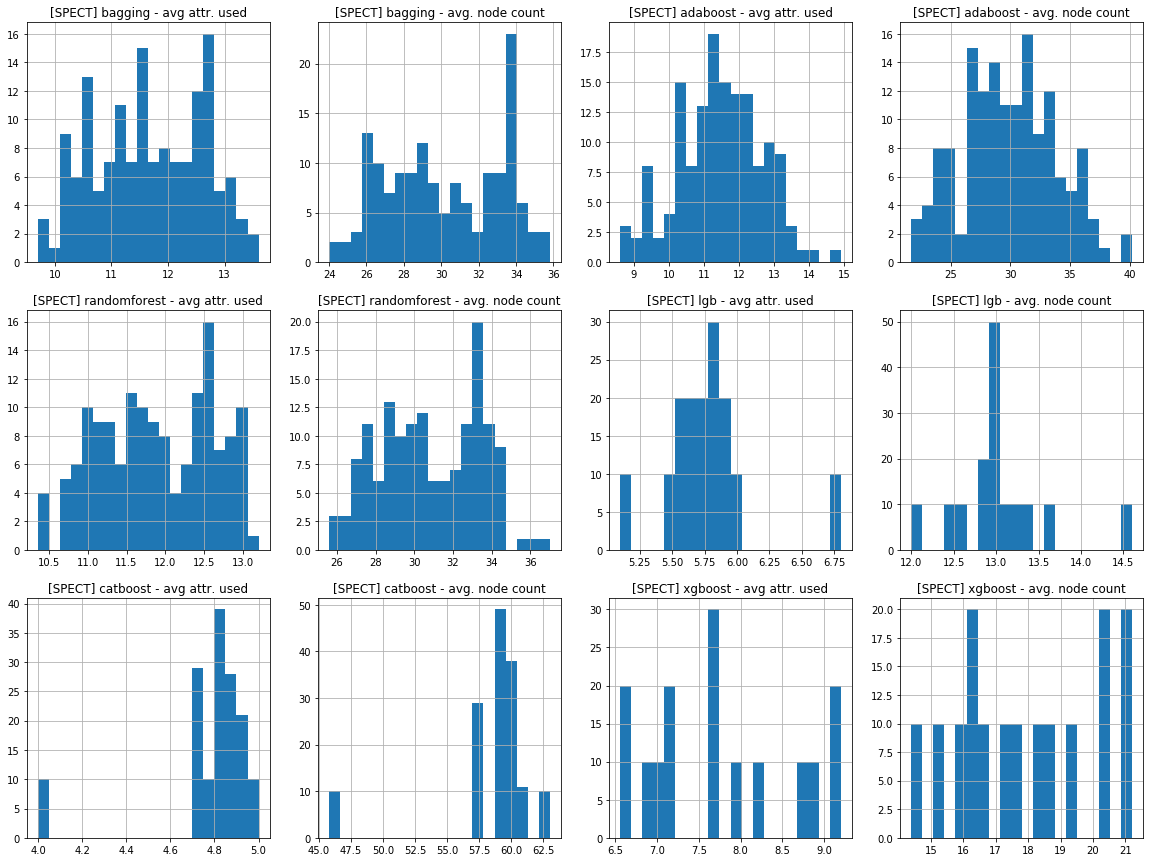

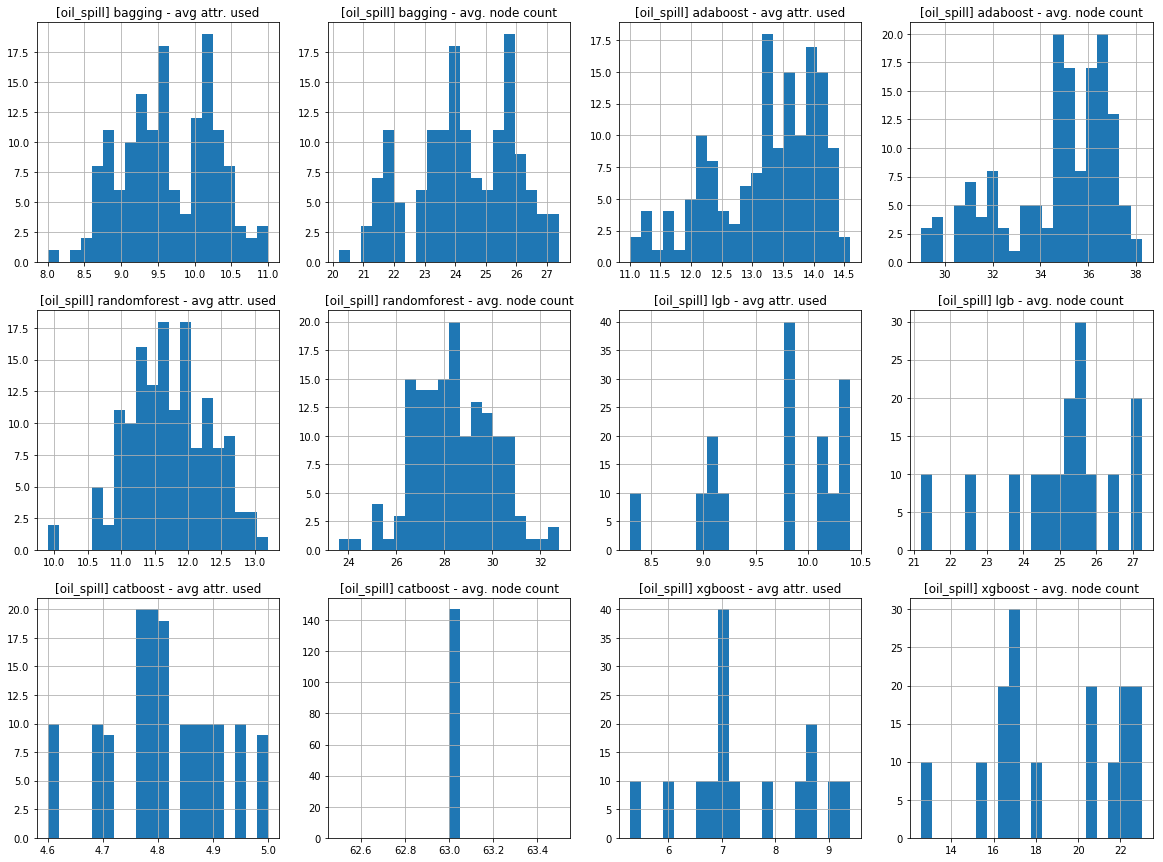

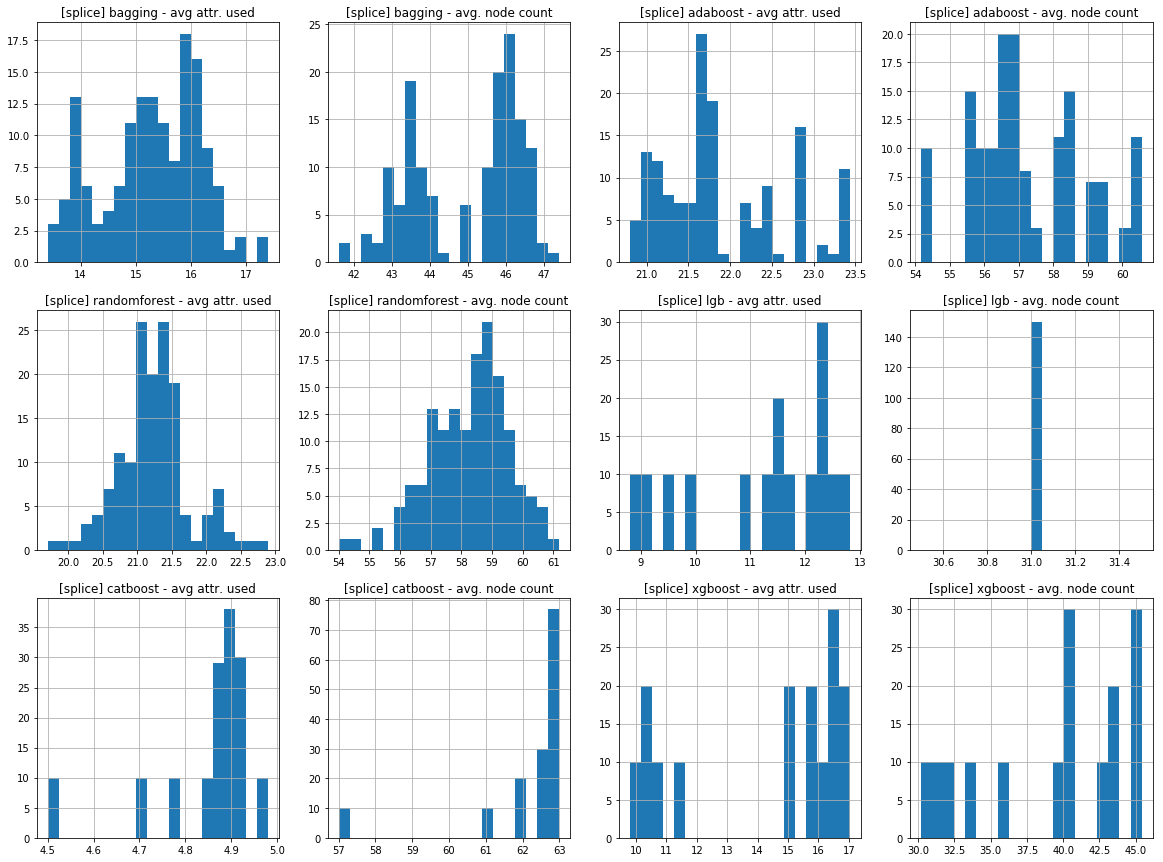

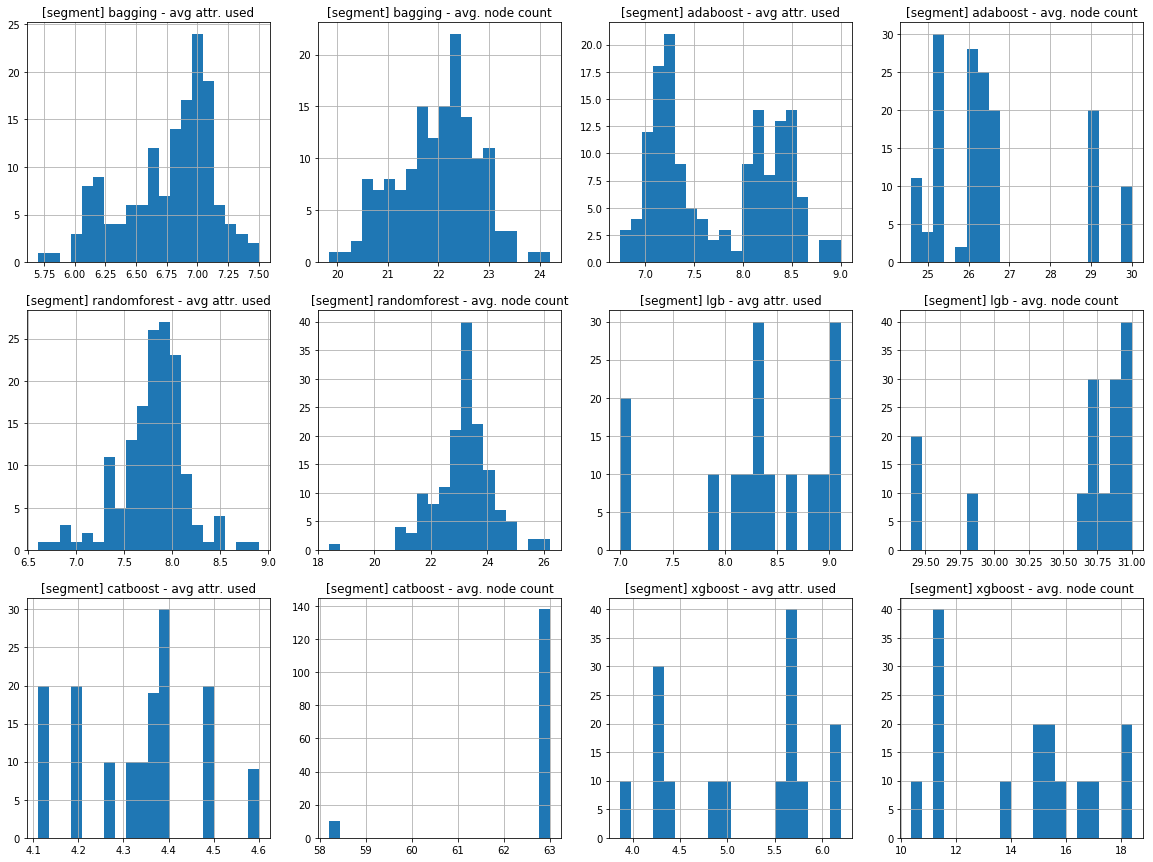

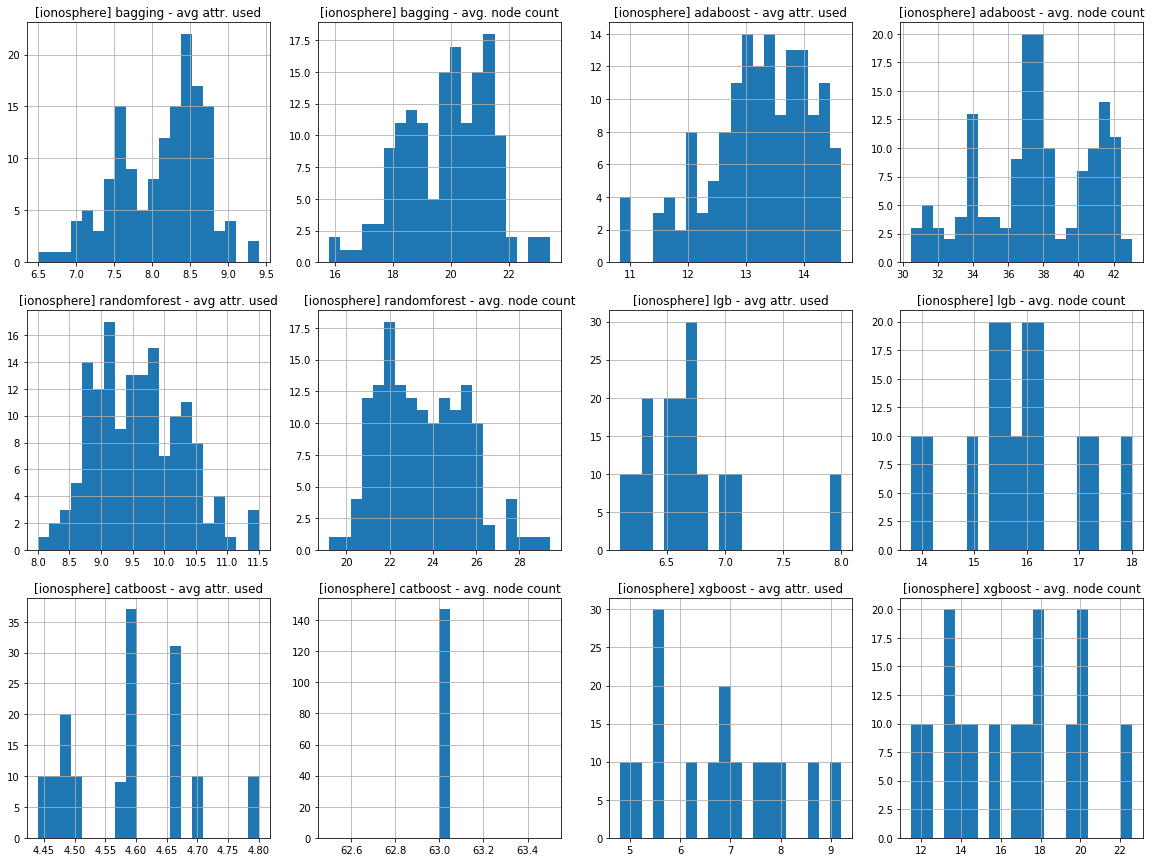

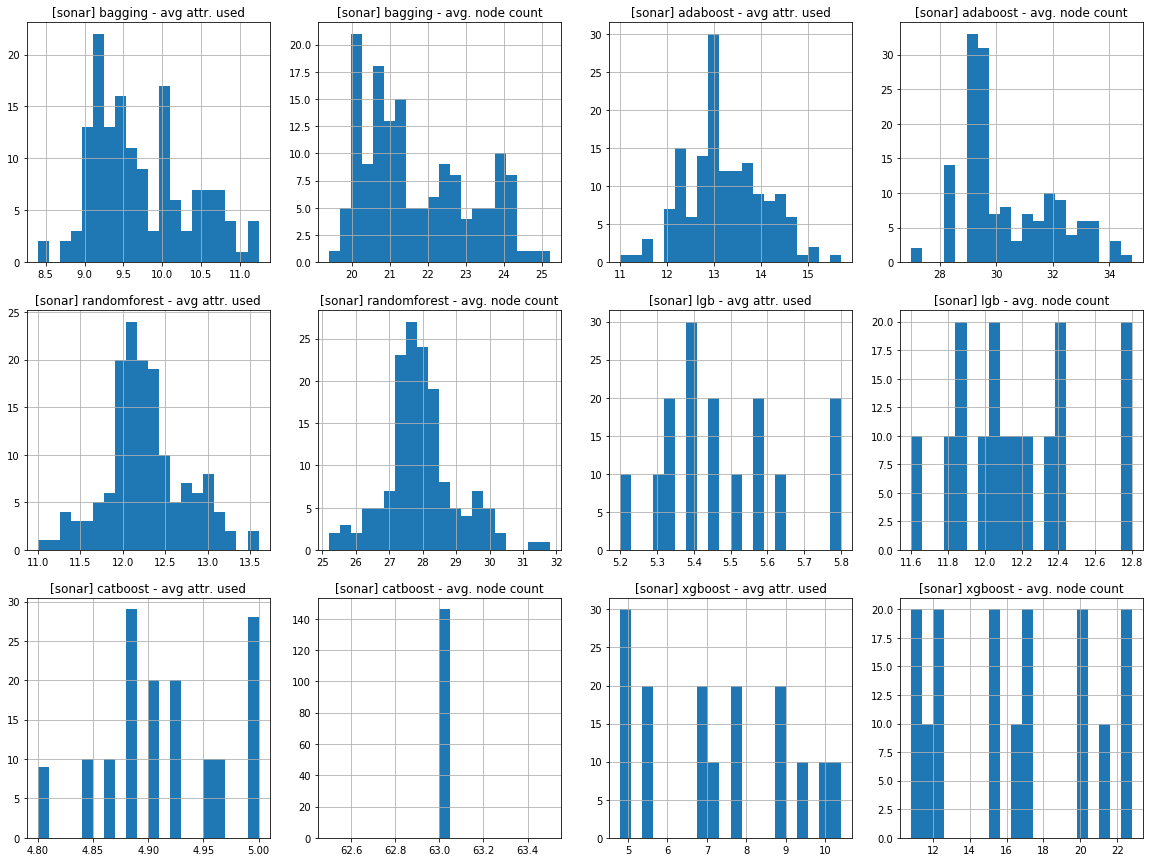

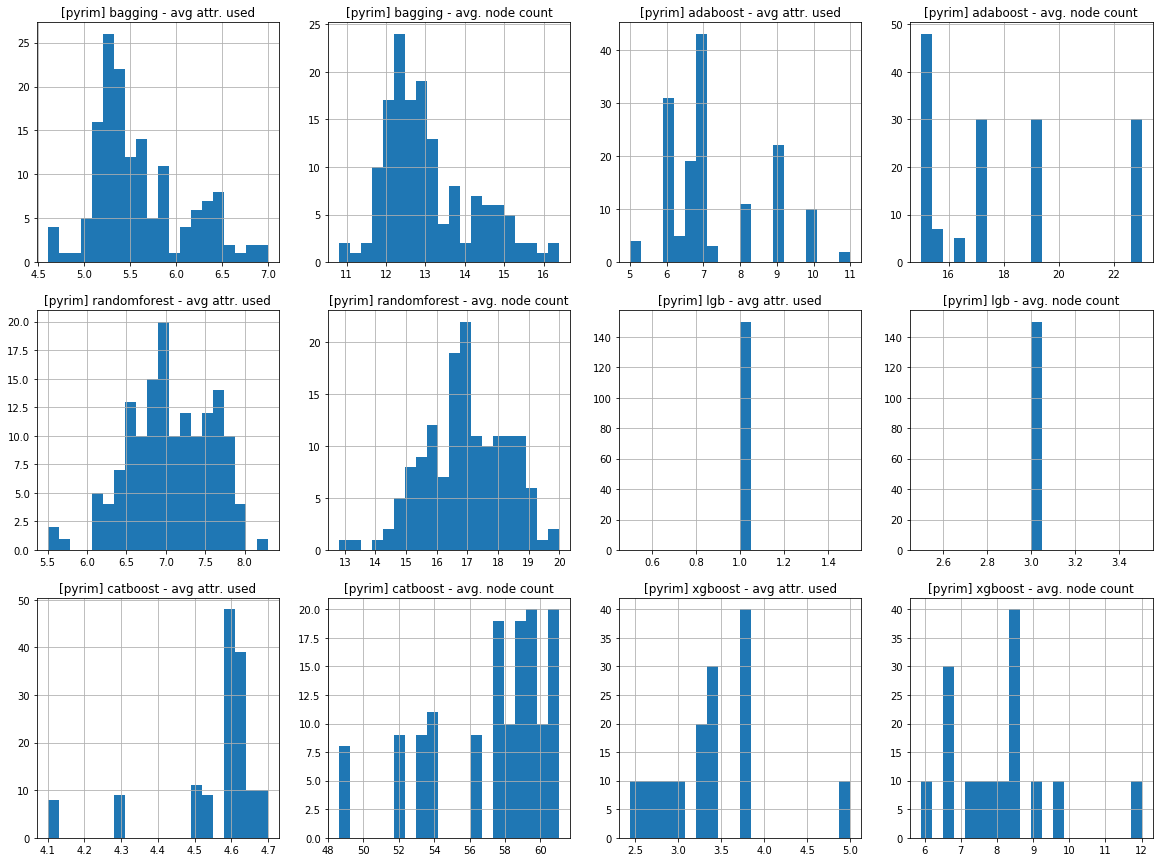

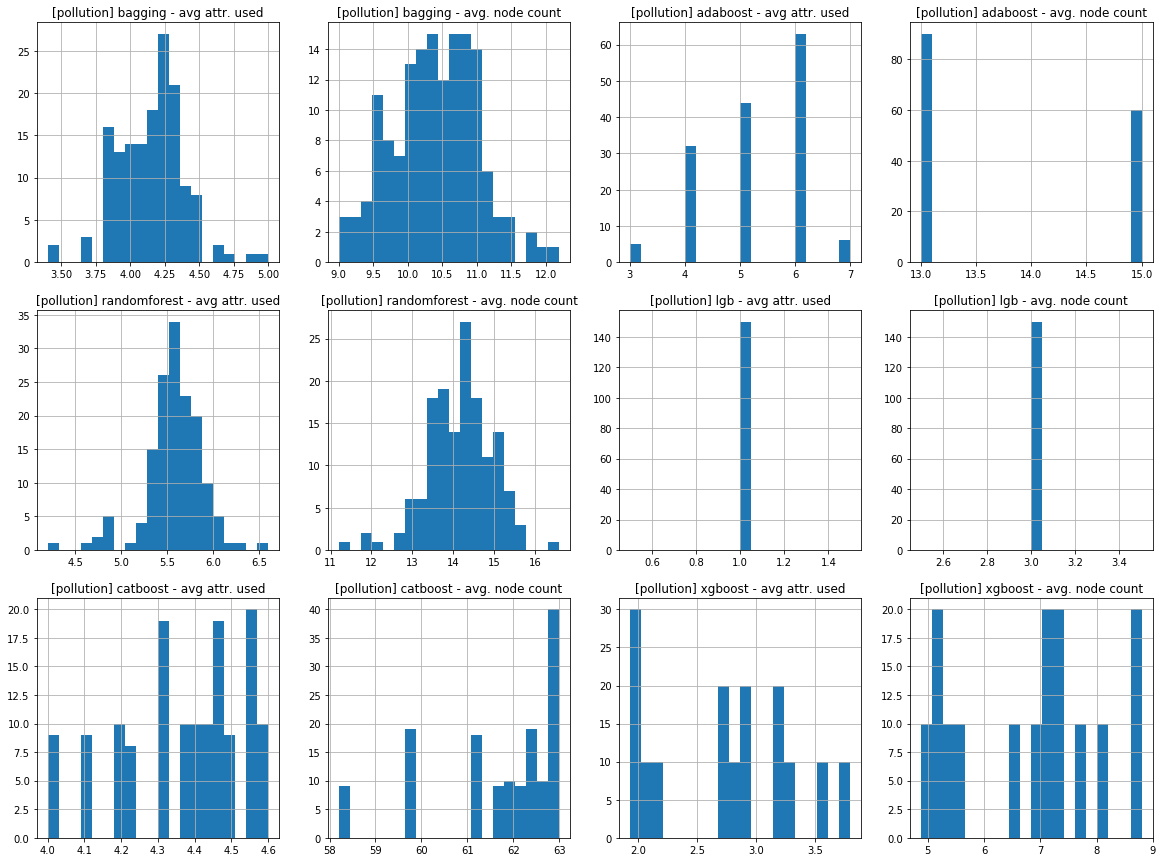

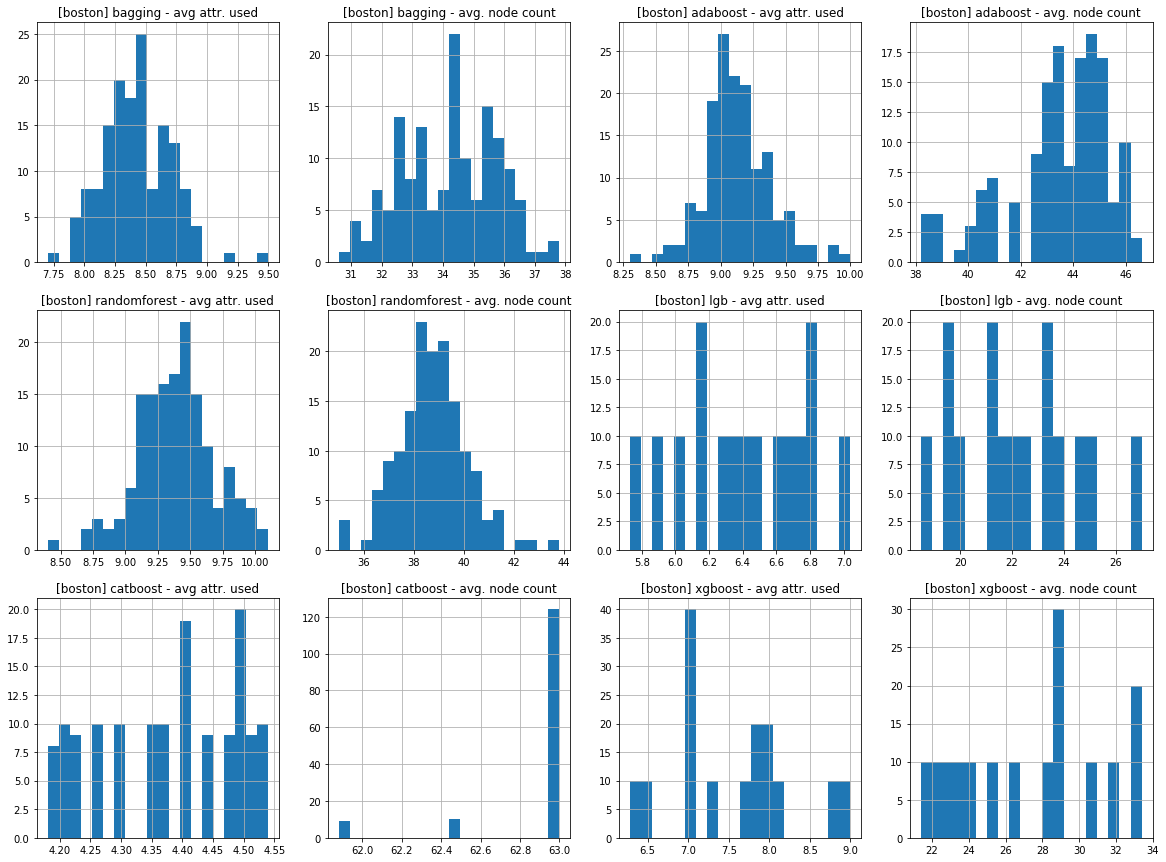

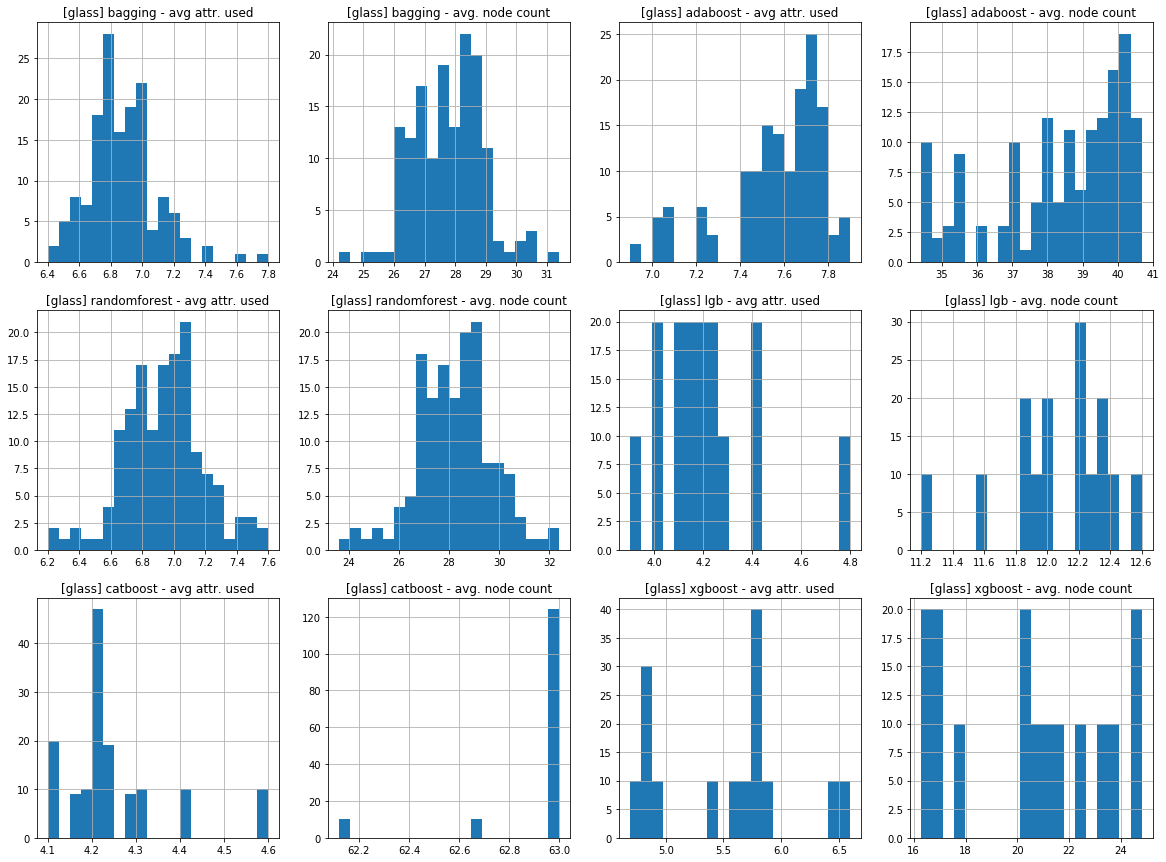

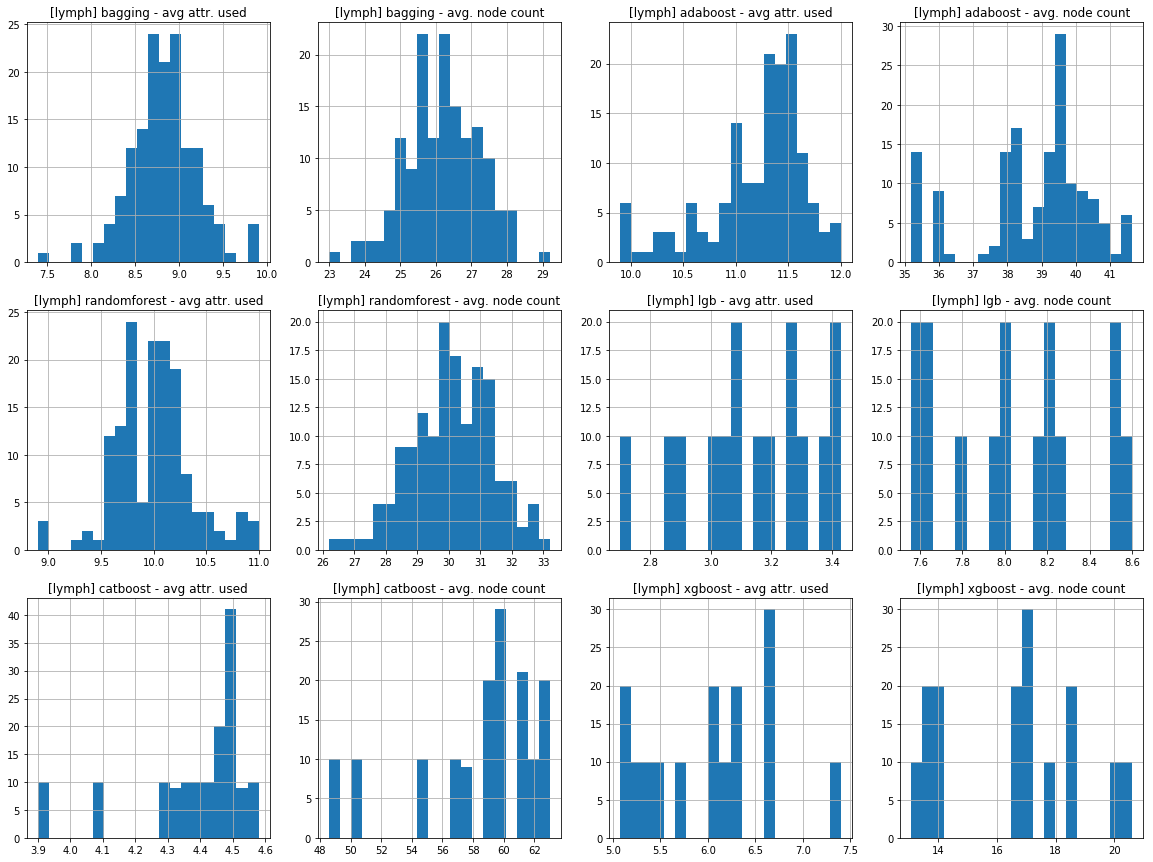

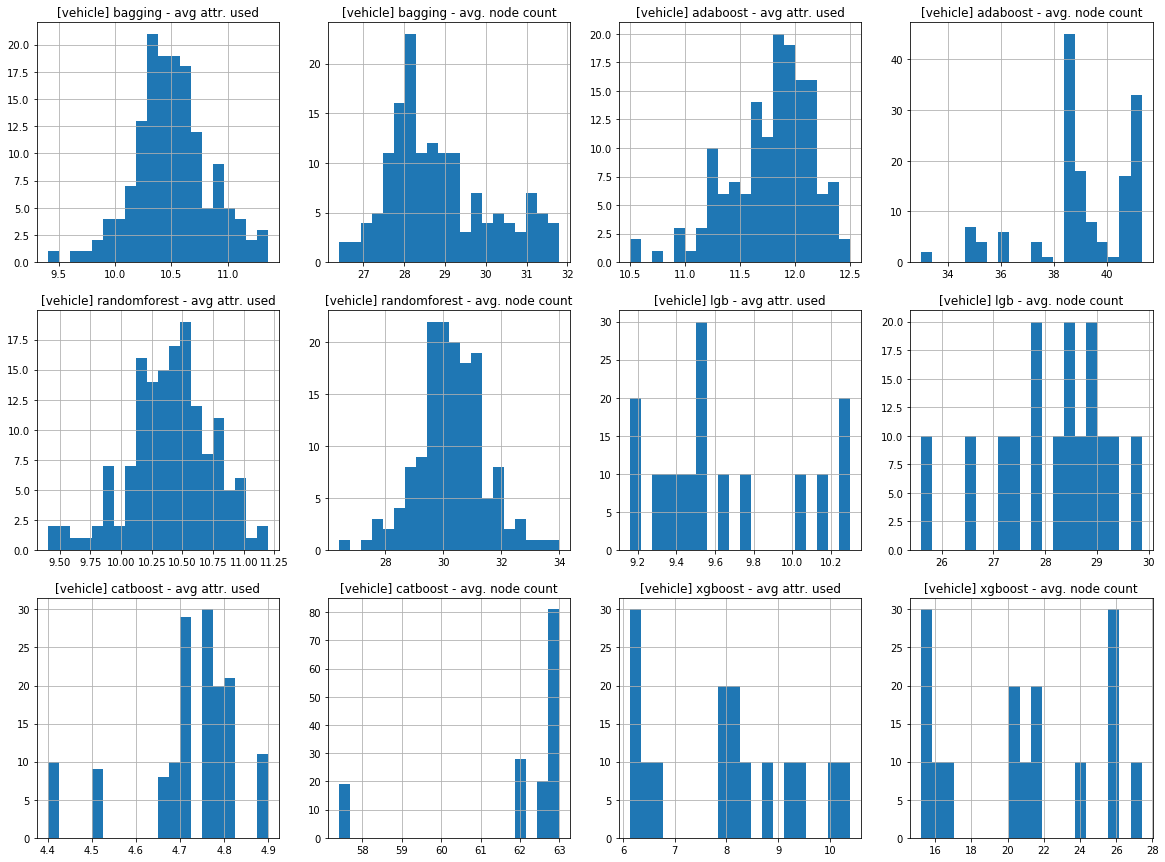

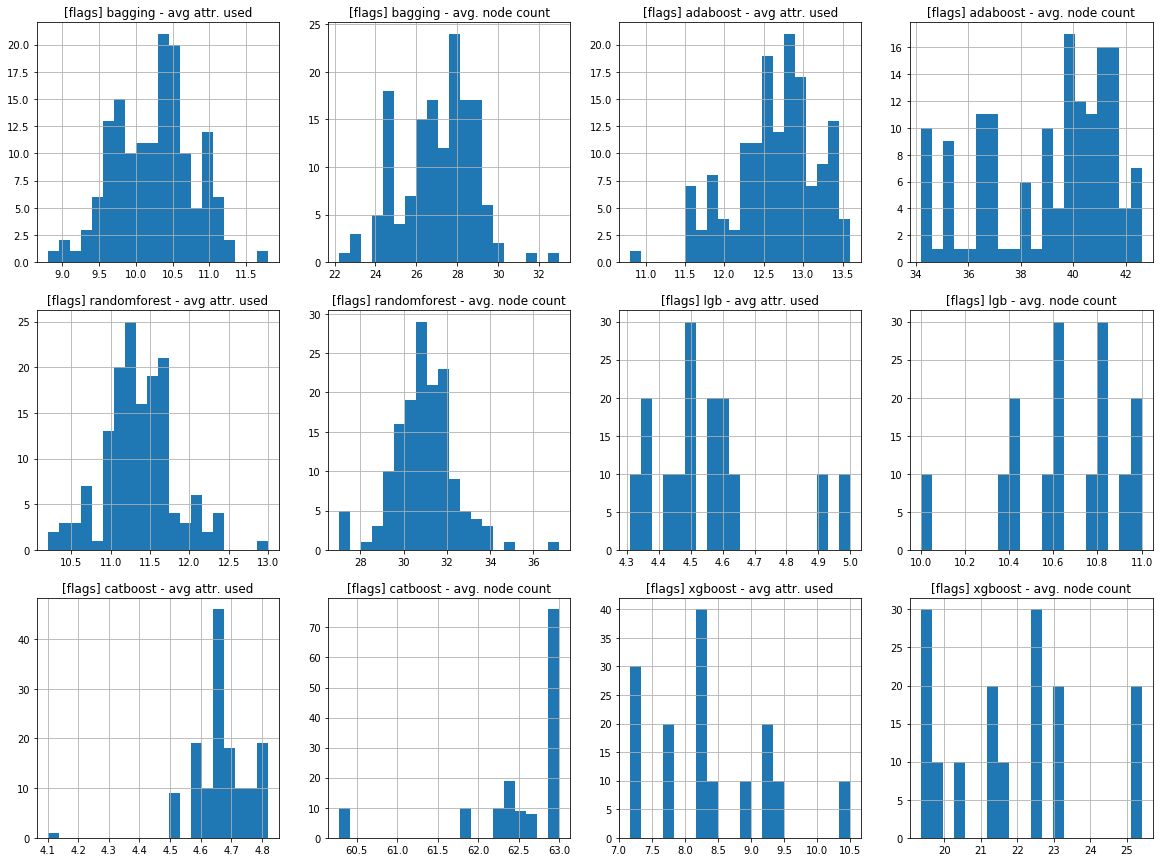

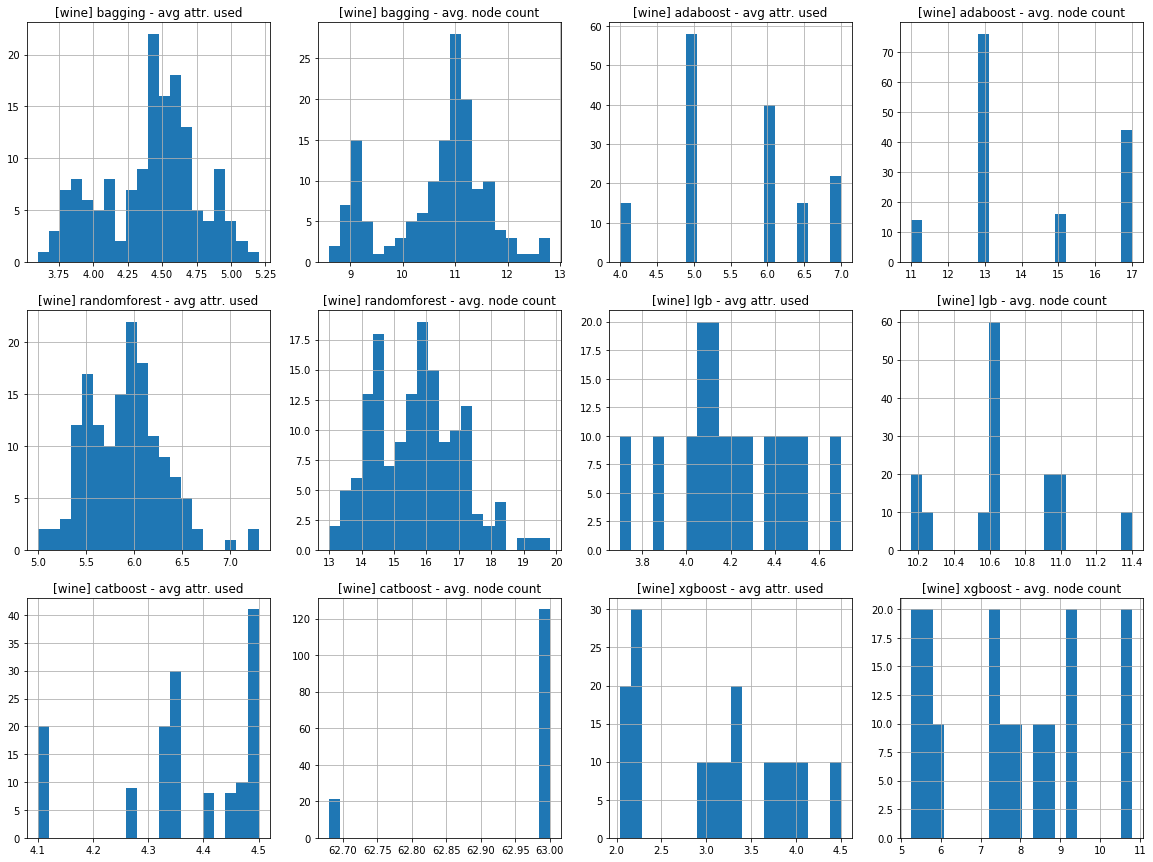

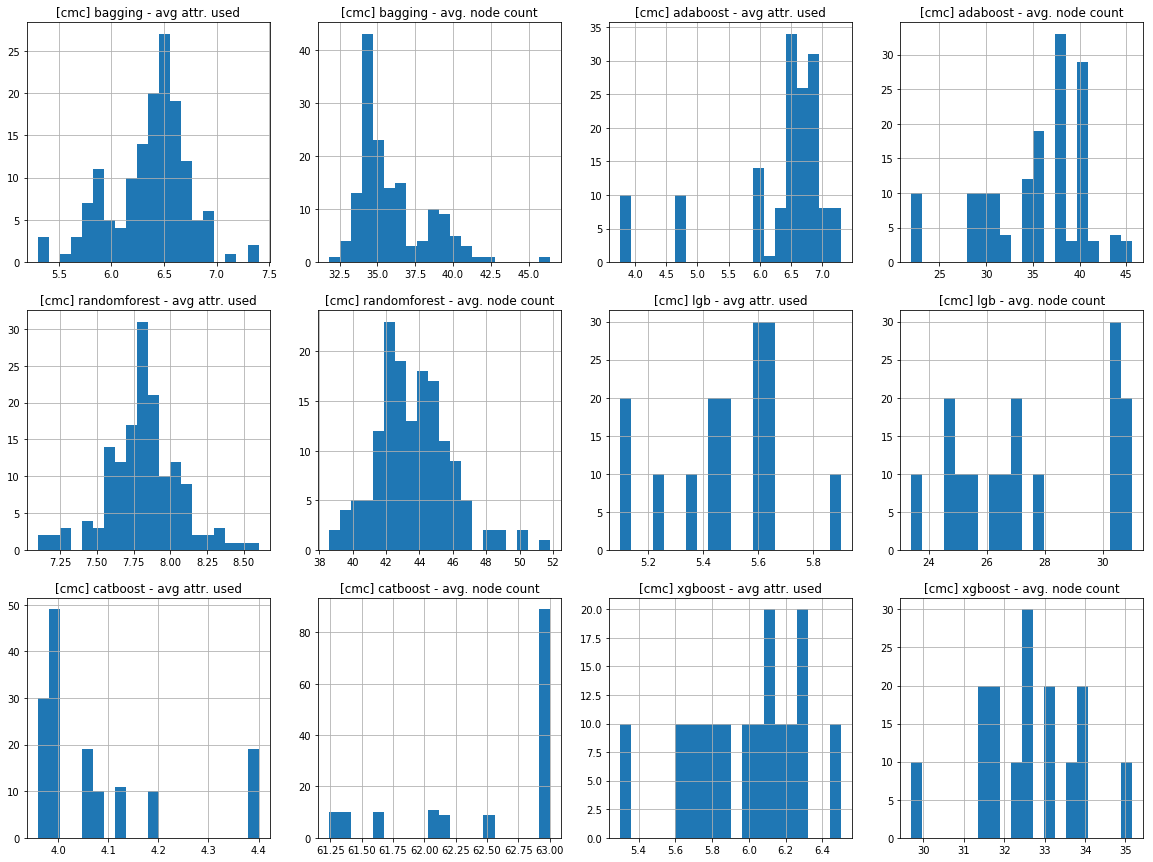

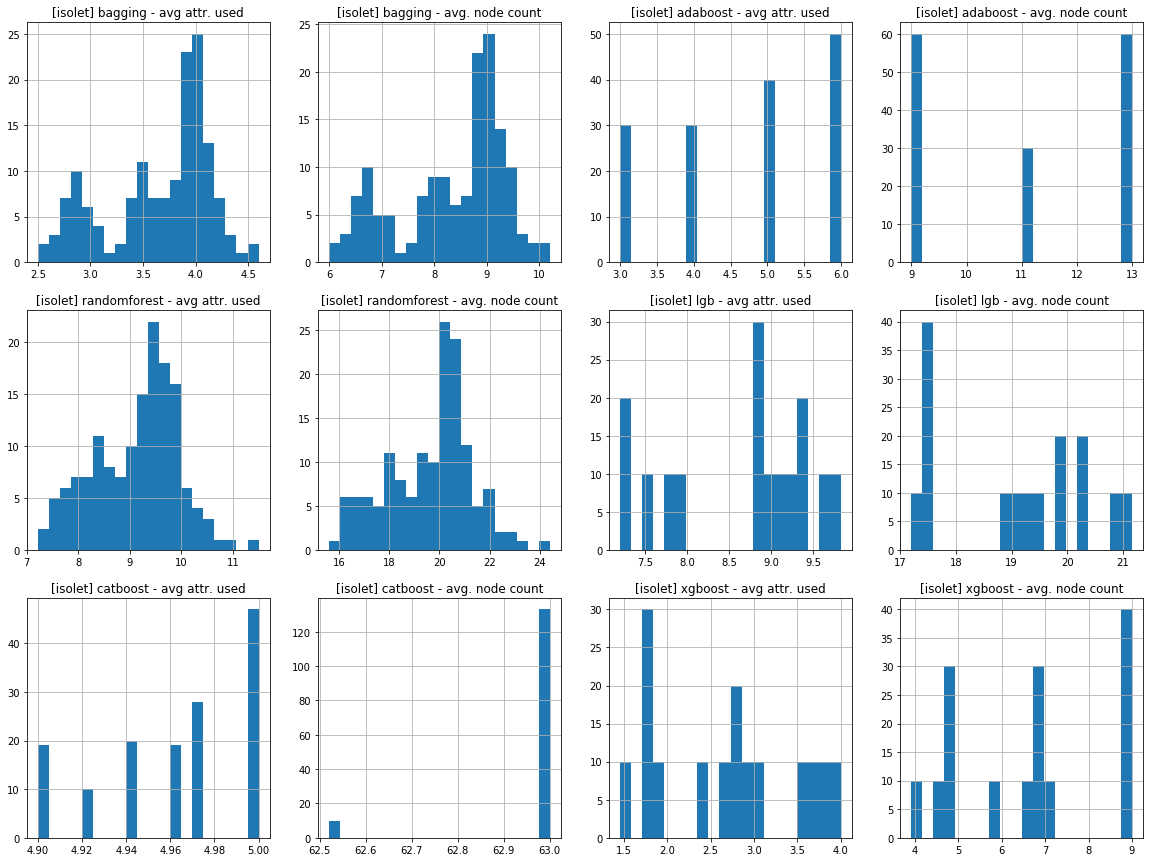

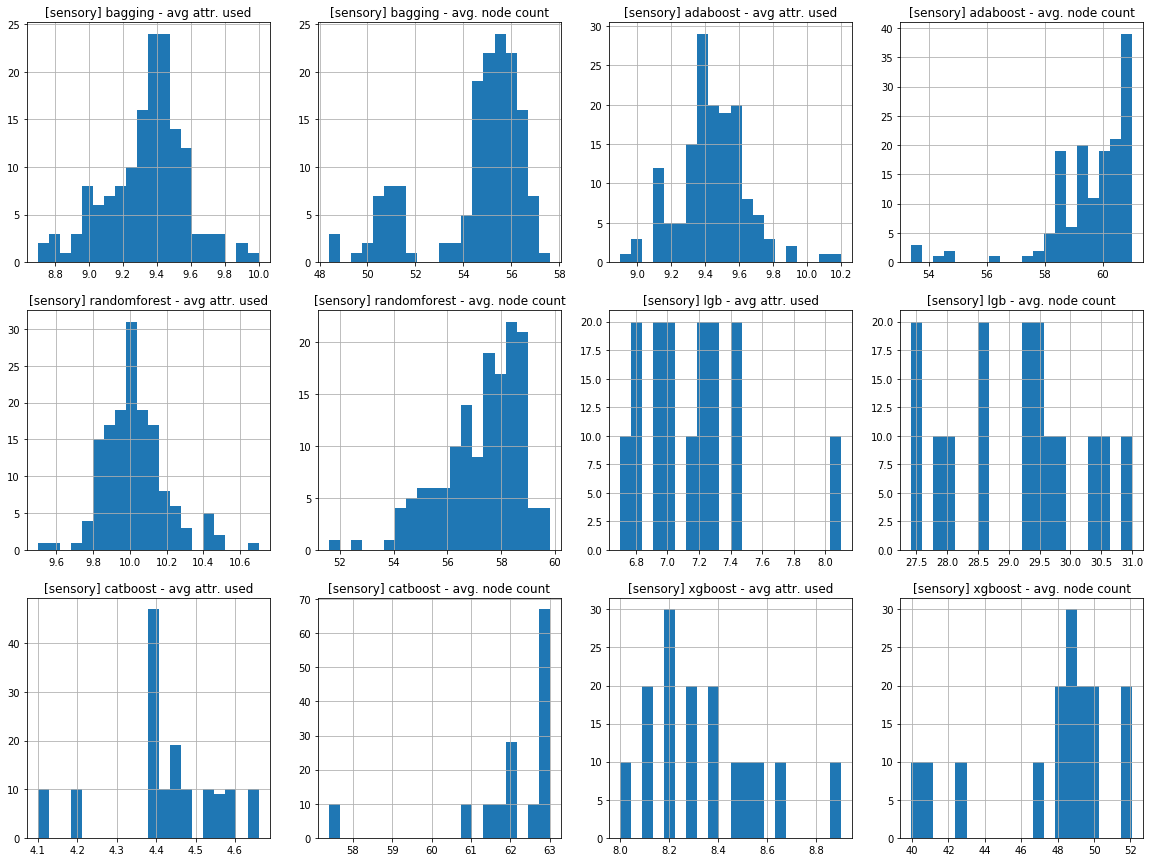

In [140]:
base_dir = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-22-09'
dfs = [(name, read_csv(base_dir, name)) for name in NAMES]

for (dataset_name, version) in BINARY_CLASS_SETS:
    fig, axes = plt.subplots(nrows=len(dfs) // 2, ncols=4, figsize=(20, 15))
    flat_axes = list(axes.flat)
    axes = [[flat_axes[i*2], flat_axes[i*2 + 1]] for i in range(len(flat_axes) // 2)]

    for (ax_left, ax_right), data in zip(axes, dfs):
        title, df = data

        df = df[df['dataset_name'] == dataset_name]
        attributes_count = df['avg_attributes_used']
        ax_left.set_title(f'[{dataset_name}] {title} - avg attr. used')
        attributes_count.hist(ax=ax_left, bins=20)

        num_nodes = df['avg_node_count']
        ax_right.set_title(f'[{dataset_name}] {title} - avg. node count')
        num_nodes.hist(ax=ax_right, bins=20)